# 01. Librerías y datos

In [297]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import geocoder
import tqdm
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from folium.map import LayerControl
import pickle
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from pykrige.ok import OrdinaryKriging
import geopandas as gpd

pd.set_option('display.max_rows', 10)

In [298]:
color_graph= '#30419B'

In [299]:
df_bau= pd.read_csv('../data/df_bau.csv')
df_bau

customeraccount tpo_cliente  Tpo_CTA  tpo_cte_op  PENSIONADO  \
0         1-656272-PP   Captacion      1.0   4000004.0         0.0   
1         1-970148-SN     Credito      1.0   2000006.0         0.0   
2         1-976614-MD     Credito      1.0   2000027.0         0.0   
3         1-538748-BB   Captacion      1.0   4000004.0         0.0   
4         1-441212-BP     Credito      2.0         NaN         0.0   
...               ...         ...      ...         ...         ...   
9996      1-843193-HS   Captacion      1.0   1000003.0         0.0   
9997      1-762249-JX     Credito      2.0         NaN         0.0   
9998      1-834617-RC     Credito      2.0         NaN         0.0   
9999      1-703679-IO     Credito      2.0         NaN         0.0   
10000             NaN         NaN      NaN         NaN         NaN   

      REVOLVENCIA  PFAE  ingreso  TDC_FCP  TDC_IMP_CP  ...  \
0      Transactor   NaN  1316.83     0.55     9681.24  ...   
1      Transactor   NaN  1180.35     0.55     9689.94  ...   
2      Transactor   NaN  8825.12     0.00        0.00  ...   
3      Transactor   NaN  6373.68     0.40     5537.26  ...   
4      Transactor   NaN  5020.60     0.00        0.00  ...   
...           ...   ...      ...      ...         ...  ...   
9996     Revolver   NaN  2222.63     0.00        0.00  ...   
9997     Revolver   NaN  4094.18     0.40    10000.00  ...   
9998   Transactor   NaN   287.19     0.55     2768.21  ...   
9999     Revolver   NaN  9113.30     0.55        0.00  ...   
10000         NaN   NaN      NaN      NaN         NaN  ...   

       Des_Rejection_Inm_HN   Des_Rejection_PP_HN  Des_Rejection_TDC_HN  \
0            1.7.Open_folio        1.1.Cte Nomina    1.0.TDC_sin_oferta   
1      1.0.Not High Network        1.1.Cte Nomina    1.0.TDC_sin_oferta   
2      1.0.Not High Network        1.1.Cte Nomina    1.0.TDC_sin_oferta   
3      1.0.Not High Network        1.1.Cte Nomina    1.0.TDC_sin_oferta   
4      1.0.Not High Network  1.0.Not High Network    1.0.TDC_sin_oferta   
...                     ...                   ...                   ...   
9996            1.0.Exc_10k           1.0.Exc_10k           1.0.Exc_10k   
9997   1.0.Not High Network        1.6.SecondLoan    1.0.TDC_sin_oferta   
9998   1.0.Not High Network  1.0.Not High Network    1.0.TDC_sin_oferta   
9999   1.0.Not High Network  1.0.Not High Network    1.0.TDC_sin_oferta   
10000                   NaN                   NaN                   NaN   

       Des_Rejection_TDC2_HN Test_Flujo  F99  F100  F101  F102  F103  
0         1.0.TDC_sin_oferta        3.0  NaN   NaN   NaN   NaN   NaN  
1         1.0.TDC_sin_oferta        2.0  NaN   NaN   NaN   NaN   NaN  
2         1.0.TDC_sin_oferta        3.0  NaN   NaN   NaN   NaN   NaN  
3         1.0.TDC_sin_oferta        2.0  NaN   NaN   NaN   NaN   NaN  
4         1.0.TDC_sin_oferta        2.0  NaN   NaN   NaN   NaN   NaN  
...                      ...        ...  ...   ...   ...   ...   ...  
9996             1.0.Exc_10k        2.0  NaN   NaN   NaN   NaN   NaN  
9997      1.0.TDC_sin_oferta        2.0  NaN   NaN   NaN   NaN   NaN  
9998      1.0.TDC_sin_oferta        3.0  NaN   NaN   NaN   NaN   NaN  
9999      1.0.TDC_sin_oferta        3.0  NaN   NaN   NaN   NaN   NaN  
10000                    NaN        NaN  NaN   NaN   NaN   NaN   NaN  

[10001 rows x 103 columns]

In [300]:
df_demograficos= pd.read_csv('../data/df_demograficos.csv')
df_demograficos

customeraccount sexo     cp       ciudad                estado cve_prom  \
0        1-294800-UH    M  27148      TORREON  COAHUILA DE ZARAGOZA    W4248   
1        1-825939-SH    F  44100  GUADALAJARA               JALISCO    W1048   
2        1-406791-GJ    M  47170   SAN JULIAN               JALISCO    W1651   
3        1-674845-PX    F  28018       COLIMA                COLIMA    X9611   
4        1-713110-DZ    M  72570       PUEBLA                PUEBLA    Z0323   
...              ...  ...    ...          ...                   ...      ...   
4205     1-990922-JO    M  62300   CUERNAVACA               MORELOS    V0001   
4206     1-909208-HH    F   4380     COYOACAN      CIUDAD DE MEXICO    W0998   
4207     1-748961-LG    F  85820      NAVOJOA                SONORA    W7903   
4208     1-998448-TS    M  62746      CUAUTLA               MORELOS    V5033   
4209     1-789799-E\    F   9260   IZTAPALAPA      CIUDAD DE MEXICO    X1048   

      cve_suc  cve_zona edo_civil  
0         424    9932.0         S  
1         104    6150.0         C  
2         165    6150.0         C  
3        1961    6150.0         C  
4        3032    9933.0         C  
...       ...       ...       ...  
4205       86    4831.0         C  
4206       99    9934.0         C  
4207      790    6777.0         C  
4208       36    4831.0         S  
4209     1104    4831.0         C  

[4210 rows x 9 columns]

In [301]:
df_errores_apsc= pd.read_csv('../data/df_errores_apsc.csv')
df_errores_apsc

ID1                     Descripción
0    201.0    El reg. no cumple con layout
1    202.0    RFC con caracteres invalidos
2    203.0  No cumple c/formato min. p/RFC
3    204.0         Edo. civil no permitido
4    205.0   Cód. Pob. debe inf. X Proceso
..     ...                             ...
309  754.0            CLOUSTER MAYOR A 999
310  755.0              SCORE CON ESPACIOS
311  756.0           CLOUSTER CON ESPACIOS
312  757.0            SCORE NO ES NUMERICO
313  758.0            SCORE ES MAYOR A 999

[314 rows x 2 columns]

In [302]:
df_errores_leap= pd.read_csv('../data/df_errores_leap.csv')
df_errores_leap

ID1                     Descripción
0      0.0                        Carga OK
1      1.0             No. De CIS no viene
2     10.0   Apellido materno con espacios
3    100.0     Fecha alta > fecha vigencia
4    101.0    Fech vigencia < fecha actual
..     ...                             ...
243   95.0  Fecha de alta no cumple format
244   96.0    Fecha de vig de BNC no viene
245   97.0  Fecha de vig de BNC no numeric
246   98.0  Fecha de vig de BNC viene cero
247   99.0  Fech de vig de BNC sin formato

[248 rows x 2 columns]

In [303]:
df_frescura= pd.read_csv('../data/df_frescura.csv')
df_frescura

NUM_CTE  OFER_6M  NUM_OFER    FRESCURA
0     1-528206-IG      4.0      10.0  Regular   
1     1-437406-CC      2.0       4.0  Irregular 
2     1-626786-GP      2.0       2.0  Irregular 
3     1-222790-TX      3.0       3.0  Regular   
4     1-639424-XP      1.0       1.0  Fresco    
...           ...      ...       ...         ...
3874  1-811044-[H      4.0       4.0  Regular   
3875  1-657969-X[      3.0       8.0  Regular   
3876  1-786377-EK      3.0       6.0  Regular   
3877  1-196875-ET      2.0       2.0  Irregular 
3878  1-168893-HY      2.0       4.0  Irregular 

[3879 rows x 4 columns]

In [304]:
df_ofertas= pd.read_csv('../data/df_ofertas.csv')
df_ofertas

NUM_CTE  PRODUCTO  SUBPROD  ID_PROCESO    DESTINO  \
0                1-920075-GV       4.0      2.0       801.0  1000001.0   
1                1-635907-XP       1.0      2.0       901.0  1000002.0   
2                1-336337-TT       1.0      2.0       901.0  1000002.0   
3                1-255718-AV       1.0      2.0       901.0  1000002.0   
4                1-255718-AV       4.0      7.0       801.0  1000003.0   
...                      ...       ...      ...         ...        ...   
7722             1-848972-VA       4.0      7.0       801.0  1000003.0   
7723             1-233293-XZ       1.0      2.0       901.0  1000002.0   
7724             1-857758-TP       4.0      2.0       801.0  1000005.0   
7725                     NaN       NaN      NaN         NaN        NaN   
7726  (7725 row(s) affected)       NaN      NaN         NaN        NaN   

       TIPO_CTE  COTIZACION  TIPO_OFERTA  \
0     1000004.0      8776.0  Preaprobado   
1     1000001.0        99.0  Preaprobado   
2     1000003.0        99.0  Preaprobado   
3     1000004.0        99.0  Preaprobado   
4     1000004.0      9257.0  Preaprobado   
...         ...         ...          ...   
7722  4000004.0      2106.0  Preaprobado   
7723  1000006.0        99.0  Preaprobado   
7724  1000004.0      1729.0  Preaprobado   
7725        NaN         NaN          NaN   
7726        NaN         NaN          NaN   

                                      DES_PROD DES_PROD_GLOBAL  ...  \
0                             Credito Personal         Consumo  ...   
1                         Grabacion Automática        Tarjetas  ...   
2                         Grabacion Automática        Tarjetas  ...   
3                         Grabacion Automática        Tarjetas  ...   
4       Disposicion Inmediata Credito Personal         Consumo  ...   
...                                        ...             ...  ...   
7722  Disposicion Inmediata Anticipo de Nomina         Consumo  ...   
7723                      Grabacion Automática        Tarjetas  ...   
7724                 Top Up Anticipo de Nomina         Consumo  ...   
7725                                       NaN             NaN  ...   
7726                                       NaN             NaN  ...   

     OBSERVACION                                   BITACORA_CAMBIOS BAJA  \
0            NaN                                                NaN   NO   
1            NaN                                                ...   NO   
2            NaN                                                ...   NO   
3            NaN                                                ...   NO   
4            NaN                                                NaN   NO   
...          ...                                                ...  ...   
7722         NaN                                                NaN   NO   
7723         NaN                                                ...   NO   
7724         NaN                                                NaN   NO   
7725         NaN                                                NaN  NaN   
7726         NaN                                                NaN  NaN   

      FECHA_BAJA  FEC_ULT_ACT_ST_021 FEC_PROCESO MES_INFORMACION  \
0            0.0                 0.0  20191104.0        201909.0   
1            0.0                 0.0  20191102.0        201909.0   
2            0.0                 0.0  20191102.0        201909.0   
3            0.0                 0.0  20191102.0        201909.0   
4            0.0                 0.0  20191104.0        201909.0   
...          ...                 ...         ...             ...   
7722         0.0                 0.0  20191104.0        201909.0   
7723         0.0                 0.0  20191102.0        201909.0   
7724         0.0                 0.0  20191106.0        201909.0   
7725         NaN                 NaN         NaN             NaN   
7726         NaN                 NaN         NaN             NaN   

     MES_INFO_EVAL  

In [305]:
df_resell= pd.read_csv('../data/df_resell.csv')
df_resell

customeraccount tpo_cliente  ID_EPP_AN  ingreso  Tipo_cte  \
0        1-405573-[\   Captacion        NaN  5413.22       NaN   
1        1-800322-OV   Captacion        NaN  9521.55       NaN   
2        1-402754-VG   Captacion        NaN  8143.16       NaN   
3        1-424328-PB     Credito        NaN  5533.74       NaN   
4        1-753702-ZW     Credito        NaN   646.98       NaN   
...              ...         ...        ...      ...       ...   
9995     1-555920-BZ     Credito        NaN  4590.73       NaN   
9996     1-843193-HS   Captacion        NaN  2222.63       NaN   
9997     1-762249-JX     Credito        NaN  4094.18       NaN   
9998     1-834617-RC     Credito        NaN   287.19       NaN   
9999     1-703679-IO     Credito        NaN  9113.30       NaN   

     rejection_inm_new  Ingreso_RESELL_PP SEGMENTO_CTE    Vigencia  \
0                  NaN           0.000000         Mass         NaN   
1                  NaN           0.000000         Mass         NaN   
2                  NaN           0.000000         Mass         NaN   
3                  NaN        9989.280252      Advance  2020-02-01   
4                  NaN           0.000000         Mass         NaN   
...                ...                ...          ...         ...   
9995               NaN           0.000000         Mass         NaN   
9996               NaN           0.000000         Mass         NaN   
9997               NaN           0.000000         Mass         NaN   
9998               NaN           0.000000         Mass         NaN   
9999               NaN           0.000000         Mass         NaN   

            Des_Rejection_RAN  ... PLAZO_AN AN_FCP  TASA_AN  Cotizacion_AN  \
0     1.1.No eval para Top up  ...      NaN    NaN      NaN            NaN   
1     1.1.No eval para Top up  ...      NaN    NaN      NaN            NaN   
2     1.1.No eval para Top up  ...      NaN    NaN      NaN            NaN   
3     1.1.No eval para Top up  ...      NaN    NaN      NaN            NaN   
4     1.1.No eval para Top up  ...      NaN    NaN      NaN            NaN   
...                       ...  ...      ...    ...      ...            ...   
9995  1.1.No eval para Top up  ...      NaN    NaN      NaN            NaN   
9996              1.0.Exc_10k  ...      NaN    NaN      NaN            NaN   
9997  1.1.No eval para Top up  ...      NaN    NaN      NaN            NaN   
9998  1.1.No eval para Top up  ...      NaN    NaN      NaN            NaN   
9999  1.1.No eval para Top up  ...      NaN    NaN      NaN            NaN   

      AN_LC  AN_IMP_CP  Res_Final_AN  Pago_Mensual_AN  Cred_Actua_AN  \
0       NaN        NaN           2.0              NaN            NaN   
1       NaN        NaN           2.0              NaN            NaN   
2       NaN        NaN           2.0              NaN            NaN   
3       NaN        NaN           2.0              NaN            NaN   
4       NaN        NaN           2.0              NaN            NaN   
...     ...        ...           ...              ...            ...   
9995    NaN        NaN           2.0              NaN            NaN   
9996    NaN        NaN           2.0              NaN            NaN   
9997    NaN        NaN           2.0              NaN            NaN   
9998    NaN        NaN           2.0              NaN            NaN   
9999    NaN        NaN           2.0              NaN            NaN   

      Test_Flujo  
0            2.0  
1            2.0  
2            3.0  
3            2.0  
4            2.0  
...          ...  
9995         3.0  
9996         2.0  
9997         2.0  
9998         3.0  
9999         3.0  

[10000 rows x 51 columns]

In [306]:
df_sucursales= pd.read_csv('../data/df_sucursales.csv')
df_sucursales

CVE_SUC                  NOM_SUC  CVE_ZONA              NOM_ZONA  \
0          1             SUC. JUAREZ.      4831    D DIV RB METRO SUR   
1          2        SUC. PLAZA DORADA      9934  D DIV RB METRO NORTE   
2          3              SUC. MERCED      4831    D DIV RB METRO SUR   
3          5          SUC. XOCHIMILCO      4831    D DIV RB METRO SUR   
4          6            SUC. DONCELES      4831    D DIV RB METRO SUR   
..       ...                      ...       ...                   ...   
708     3917  SUC. ENLACE SORIANA MTY      9932        D DIV RB NORTE   
709     3939  SUC. TELEVISA SAN ANGEL      4831    D DIV RB METRO SUR   
710     3976                TRES RIOS      6777    D DIV  RB NOROESTE   
711     3982         PLAZA LAS VILLAS      6150    D DIV RB OCCIDENTE   
712     6994   SUC. SEGMENTOS REFORMA      9934  D DIV RB METRO NORTE   

     CVE_COORD           NOM_COORD  
0         5202       MS02 - CENTRO  
1         5209     MN09 - ECATEPEC  
2         5202       MS02 - CENTRO  
3         5215   MS07 - XOCHIMILCO  
4         5202       MS02 - CENTRO  
..         ...                 ...  
708       8003   N02 - MONTERREY 2  
709       5230    MS01 - ALTAVISTA  
710       7103  NO09 - SINALOA SUR  
711       6049   O03 - GUADALAJARA  
712       9764      MN02 - REFORMA  

[713 rows x 6 columns]

In [307]:
gdf= gpd.read_file('../data/dest2019gw/dest2019gw.shp')
gdf

CVE_ENT                          NOM_ENT  CVE_CAP  \
0       01                   Aguascalientes    10001   
1       02                  Baja California    20001   
2       03              Baja California Sur    30001   
3       04                         Campeche    20001   
4       05             Coahuila de Zaragoza   300001   
..     ...                              ...      ...   
27      28                       Tamaulipas   410001   
28      29                         Tlaxcala   330001   
29      30  Veracruz de Ignacio de la Llave   870001   
30      31                         YucatÃ¡n   500001   
31      32                        Zacatecas   560001   

                      NOM_CAP          AREA    PERIMETER  COV_  COV_ID  \
0              Aguascalientes  5.558674e+05   423.005983     0       1   
1                    Mexicali  7.337664e+06  3186.327804     1       2   
2                      La Paz  7.138171e+06  5536.692177     2       3   
3   San Francisco de Campeche  5.526633e+06  3069.969852     3       4   
4                    Saltillo  1.506712e+07  2414.885297     4       5   
..                        ...           ...          ...   ...     ...   
27            Ciudad Victoria  7.729816e+06  5234.233296    27      28   
28  Tlaxcala de XicohtÃ©ncatl  3.973387e+05   418.723228    28      29   
29           Xalapa-EnrÃ­quez  7.021463e+06  6456.217963    29      30   
30                    MÃ©rida  3.924998e+06  1664.194533    30      31   
31                  Zacatecas  7.447971e+06  3166.164289    31      32   

                                             geometry  
0   POLYGON ((-101.86167 22.02888, -101.86167 22.0...  
1   MULTIPOLYGON (((-114.12889 28.01224, -114.1284...  
2   MULTIPOLYGON (((-109.89451 22.87476, -109.8946...  
3   MULTIPOLYGON (((-91.55147 18.28639, -91.55253 ...  
4   POLYGON ((-99.84322 27.76986, -99.85626 27.755...  
..                                                ...  
27  MULTIPOLYGON (((-97.85932 22.62419, -97.85998 ...  
28  POLYGON ((-98.65323 19.46599, -98.65323 19.465...  
29  MULTIPOLYGON (((-94.93376 17.40144, -94.93330 ...  
30  MULTIPOLYGON (((-92.22410 20.90800, -92.22470 ...  
31  POLYGON ((-100.79993 24.55619, -100.79646 24.5...  

[32 rows x 9 columns]

# 02. Limpieza de datos

In [308]:
df_bau = df_bau.dropna(thresh=0.1*len(df_bau), axis=1)
df_bau = df_bau.dropna(how='all', axis=0)
df_bau

customeraccount tpo_cliente  Tpo_CTA  tpo_cte_op  PENSIONADO REVOLVENCIA  \
0        1-656272-PP   Captacion      1.0   4000004.0         0.0  Transactor   
1        1-970148-SN     Credito      1.0   2000006.0         0.0  Transactor   
2        1-976614-MD     Credito      1.0   2000027.0         0.0  Transactor   
3        1-538748-BB   Captacion      1.0   4000004.0         0.0  Transactor   
4        1-441212-BP     Credito      2.0         NaN         0.0  Transactor   
...              ...         ...      ...         ...         ...         ...   
9995     1-555920-BZ     Credito      2.0         NaN         0.0  Transactor   
9996     1-843193-HS   Captacion      1.0   1000003.0         0.0    Revolver   
9997     1-762249-JX     Credito      2.0         NaN         0.0    Revolver   
9998     1-834617-RC     Credito      2.0         NaN         0.0  Transactor   
9999     1-703679-IO     Credito      2.0         NaN         0.0    Revolver   

      ingreso  TDC_FCP  TDC_IMP_CP       TDC_LC  ... bnd_oferta_ATM  \
0     1316.83     0.55     9681.24     0.000000  ...            NaN   
1     1180.35     0.55     9689.94   536.089139  ...            NaN   
2     8825.12     0.00        0.00     0.000000  ...            NaN   
3     6373.68     0.40     5537.26     0.000000  ...            NaN   
4     5020.60     0.00        0.00     0.000000  ...            1.0   
...       ...      ...         ...          ...  ...            ...   
9995  4590.73     0.55    10000.00  2769.780412  ...            1.0   
9996  2222.63     0.00        0.00     0.000000  ...            NaN   
9997  4094.18     0.40    10000.00  6012.578311  ...            NaN   
9998   287.19     0.55     2768.21  6341.120371  ...            1.0   
9999  9113.30     0.55        0.00     0.000000  ...            1.0   

      bnd_oferta_PIB  bnd_oferta_MOBILE bnd_oferta_CC  flag_hn  \
0                NaN                NaN           NaN      0.0   
1                NaN                NaN           NaN      0.0   
2                NaN                NaN           NaN      0.0   
3                NaN                NaN           NaN      0.0   
4                1.0                1.0           1.0      0.0   
...              ...                ...           ...      ...   
9995             0.0                1.0           1.0      0.0   
9996             NaN                NaN           NaN      0.0   
9997             NaN                NaN           NaN      0.0   
9998             0.0                1.0           1.0      0.0   
9999             0.0                1.0           1.0      0.0   

      Des_Rejection_Inm_HN   Des_Rejection_PP_HN  Des_Rejection_TDC_HN  \
0           1.7.Open_folio        1.1.Cte Nomina    1.0.TDC_sin_oferta   
1     1.0.Not High Network        1.1.Cte Nomina    1.0.TDC_sin_oferta   
2     1.0.Not High Network        1.1.Cte Nomina    1.0.TDC_sin_oferta   
3     1.0.Not High Network        1.1.Cte Nomina    1.0.TDC_sin_oferta   
4     1.0.Not High Network  1.0.Not High Network    1.0.TDC_sin_oferta   
...                    ...                   ...                   ...   
9995  1.0.Not High Network  1.0.Not High Network    1.0.TDC_sin_oferta   
9996           1.0.Exc_10k           1.0.Exc_10k           1.0.Exc_10k   
9997  1.0.Not High Network        1.6.SecondLoan    1.0.TDC_sin_oferta   
9998  1.0.Not High Network  1.0.Not High Network    1.0.TDC_sin_oferta   
9999  1.0.Not High Network  1.0.Not High Network    1.0.TDC_sin_oferta   

      Des_Rejection_TDC2_HN  Test_Flujo  
0        1.0.TDC_sin_oferta         3.0  
1        1.0.TDC_sin_oferta         2.0  
2        1.0.TDC_sin_oferta         3.0  
3        1.0.TDC_sin_oferta         2.0  
4        1.0.TDC_sin_oferta         2.0  
...                     ...         ...  
9995     1.0.TDC_sin_oferta         3.0  
9996            1.0.Exc_10k         2.0  
9997     1.0.TDC_sin_oferta         2.0  
9998     1.0.TDC_sin_oferta         3.0  
9999     1.0.TDC_sin_oferta        

In [309]:
df_ofertas= df_ofertas.dropna(thresh=0.1*len(df_ofertas), axis=1)
df_ofertas= df_ofertas.dropna(thresh=0.1*len(df_ofertas.columns), axis=0)
df_ofertas

NUM_CTE  PRODUCTO  SUBPROD  ID_PROCESO    DESTINO   TIPO_CTE  \
0     1-920075-GV       4.0      2.0       801.0  1000001.0  1000004.0   
1     1-635907-XP       1.0      2.0       901.0  1000002.0  1000001.0   
2     1-336337-TT       1.0      2.0       901.0  1000002.0  1000003.0   
3     1-255718-AV       1.0      2.0       901.0  1000002.0  1000004.0   
4     1-255718-AV       4.0      7.0       801.0  1000003.0  1000004.0   
...           ...       ...      ...         ...        ...        ...   
7720  1-105896-XX       4.0      7.0       801.0  1000003.0  1000004.0   
7721  1-301865-AK       1.0      2.0       901.0  1000002.0  1000004.0   
7722  1-848972-VA       4.0      7.0       801.0  1000003.0  4000004.0   
7723  1-233293-XZ       1.0      2.0       901.0  1000002.0  1000006.0   
7724  1-857758-TP       4.0      2.0       801.0  1000005.0  1000004.0   

      COTIZACION  TIPO_OFERTA                                  DES_PROD  \
0         8776.0  Preaprobado                          Credito Personal   
1           99.0  Preaprobado                      Grabacion Automática   
2           99.0  Preaprobado                      Grabacion Automática   
3           99.0  Preaprobado                      Grabacion Automática   
4         9257.0  Preaprobado    Disposicion Inmediata Credito Personal   
...          ...          ...                                       ...   
7720      1715.0  Preaprobado    Disposicion Inmediata Credito Personal   
7721        99.0  Preaprobado                      Grabacion Automática   
7722      2106.0  Preaprobado  Disposicion Inmediata Anticipo de Nomina   
7723        99.0  Preaprobado                      Grabacion Automática   
7724      1729.0  Preaprobado                 Top Up Anticipo de Nomina   

     DES_PROD_GLOBAL  ... TIPO  \
0            Consumo  ...  1.0   
1           Tarjetas  ...  1.0   
2           Tarjetas  ...  1.0   
3           Tarjetas  ...  1.0   
4            Consumo  ...  1.0   
...              ...  ...  ...   
7720         Consumo  ...  1.0   
7721        Tarjetas  ...  1.0   
7722         Consumo  ...  1.0   
7723        Tarjetas  ...  1.0   
7724         Consumo  ...  1.0   

                                       BITACORA_CAMBIOS BAJA  FECHA_BAJA  \
0                                                   NaN   NO         0.0   
1                                                   ...   NO         0.0   
2                                                   ...   NO         0.0   
3                                                   ...   NO         0.0   
4                                                   NaN   NO         0.0   
...                                                 ...  ...         ...   
7720                                                NaN   NO         0.0   
7721                                                ...   NO         0.0   
7722                                                NaN   NO         0.0   
7723                                                ...   NO         0.0   
7724                                                NaN   NO         0.0   

      FEC_ULT_ACT_ST_021 FEC_PROCESO MES_INFORMACION MES_INFO_EVAL  \
0                    0.0  20191104.0        201909.0      201910.0   
1                    0.0  20191102.0        201909.0      201910.0   
2                    0.0  20191102.0        201909.0      201910.0   
3                    0.0  20191102.0        201909.0      201910.0   
4                    0.0  20191104.0        201909.0      201910.0   
...                  ...         ...             ...           ...   
7720                 0.0  20191104.0        201909.0      201910.0   
7721                 0.0  20191102.0        201909.0      201910.0   
7722                 0.0  20191104.0        201909.0      201910.0   
7723                 0.0  20191102.0        201909.0      201910.0   
7724                 0.0  20191106.0        201909.0      201910.0   

      MES_CAMPANA                                        

In [310]:
df_resell= df_resell.dropna(thresh=0.1*len(df_resell), axis=1)
df_resell

customeraccount tpo_cliente  ingreso  Ingreso_RESELL_PP SEGMENTO_CTE  \
0        1-405573-[\   Captacion  5413.22           0.000000         Mass   
1        1-800322-OV   Captacion  9521.55           0.000000         Mass   
2        1-402754-VG   Captacion  8143.16           0.000000         Mass   
3        1-424328-PB     Credito  5533.74        9989.280252      Advance   
4        1-753702-ZW     Credito   646.98           0.000000         Mass   
...              ...         ...      ...                ...          ...   
9995     1-555920-BZ     Credito  4590.73           0.000000         Mass   
9996     1-843193-HS   Captacion  2222.63           0.000000         Mass   
9997     1-762249-JX     Credito  4094.18           0.000000         Mass   
9998     1-834617-RC     Credito   287.19           0.000000         Mass   
9999     1-703679-IO     Credito  9113.30           0.000000         Mass   

            Des_Rejection_RAN        Des_Rejection_RPP  \
0     1.1.No eval para Top up  1.1.No eval para Top up   
1     1.1.No eval para Top up  1.1.No eval para Top up   
2     1.1.No eval para Top up  1.1.No eval para Top up   
3     1.1.No eval para Top up             2.1.Approved   
4     1.1.No eval para Top up  1.1.No eval para Top up   
...                       ...                      ...   
9995  1.1.No eval para Top up  1.1.No eval para Top up   
9996              1.0.Exc_10k              1.0.Exc_10k   
9997  1.1.No eval para Top up  1.1.No eval para Top up   
9998  1.1.No eval para Top up  1.1.No eval para Top up   
9999  1.1.No eval para Top up  1.1.No eval para Top up   

           Des_Rejection_RINM   HD  Estrategia_1  Estrategia_2  Estrategia_3  \
0     1.1.No eval para Top up  0.0           0.0           2.0           0.0   
1     1.1.No eval para Top up  0.0           0.0           2.0           0.0   
2     1.1.No eval para Top up  0.0           0.0           2.0           0.0   
3     1.1.No eval para Top up  0.0           0.0           2.0           0.0   
4     1.1.No eval para Top up  0.0           0.0           2.0           0.0   
...                       ...  ...           ...           ...           ...   
9995  1.1.No eval para Top up  0.0           0.0           2.0           0.0   
9996              1.0.Exc_10k  0.0           0.0           2.0           0.0   
9997  1.1.No eval para Top up  0.0           0.0           2.0           0.0   
9998  1.1.No eval para Top up  0.0           0.0           2.0           0.0   
9999  1.1.No eval para Top up  0.0           0.0           2.0           0.0   

      RES_FINAL_INM  Res_Final_PP  Res_Final_AN  Test_Flujo  
0               2.0           2.0           2.0         2.0  
1               2.0           2.0           2.0         2.0  
2               2.0           2.0           2.0         3.0  
3               2.0           1.0           2.0         2.0  
4               2.0           2.0           2.0         2.0  
...             ...           ...           ...         ...  
9995            2.0           2.0           2.0         3.0  
9996            2.0           2.0           2.0         2.0  
9997            2.0           2.0           2.0         2.0  
9998            2.0           2.0           2.0         3.0  
9999            2.0           2.0           2.0         3.0  

[10000 rows x 16 columns]

In [311]:
df_demograficos_sucursales= pd.merge(df_demograficos, df_sucursales, right_on='CVE_SUC', left_on='cve_suc', how='inner')
df_demograficos_sucursales

customeraccount sexo     cp       ciudad                estado cve_prom  \
0        1-294800-UH    M  27148      TORREON  COAHUILA DE ZARAGOZA    W4248   
1        1-825939-SH    F  44100  GUADALAJARA               JALISCO    W1048   
2        1-406791-GJ    M  47170   SAN JULIAN               JALISCO    W1651   
3        1-674845-PX    F  28018       COLIMA                COLIMA    X9611   
4        1-713110-DZ    M  72570       PUEBLA                PUEBLA    Z0323   
...              ...  ...    ...          ...                   ...      ...   
4199     1-990922-JO    M  62300   CUERNAVACA               MORELOS    V0001   
4200     1-909208-HH    F   4380     COYOACAN      CIUDAD DE MEXICO    W0998   
4201     1-748961-LG    F  85820      NAVOJOA                SONORA    W7903   
4202     1-998448-TS    M  62746      CUAUTLA               MORELOS    V5033   
4203     1-789799-E\    F   9260   IZTAPALAPA      CIUDAD DE MEXICO    X1048   

      cve_suc  cve_zona edo_civil  CVE_SUC                   NOM_SUC  \
0         424    9932.0         S      424          SUC. LOS ANGELES   
1         104    6150.0         C      104           SUC. PROVINCIAL   
2         165    6150.0         C      165           SUC. SAN JULIAN   
3        1961    6150.0         C     1961      SUC. SEVILLA DEL RIO   
4        3032    9933.0         C     3032       SUC. REFORMA CENTRO   
...       ...       ...       ...      ...                       ...   
4199       86    4831.0         C       86  SUC. CUERNAVACA LA SELVA   
4200       99    9934.0         C       99           SUC. TORRE HSBC   
4201      790    6777.0         C      790            SUC. PESQUEIRA   
4202       36    4831.0         S       36              SUC. MIXCOAC   
4203     1104    4831.0         C     1104  SUC. CONSTITUCION DEL 17   

      CVE_ZONA              NOM_ZONA  CVE_COORD            NOM_COORD  
0         9932        D DIV RB NORTE       8727        N09 - TORREON  
1         6150    D DIV RB OCCIDENTE       6056    O02 - GUADALAJARA  
2         6150    D DIV RB OCCIDENTE       6053  O05 - ALTOS JALISCO  
3         6150    D DIV RB OCCIDENTE       6044         O06 - COLIMA  
4         9933         D DIV RB  SUR       5223         S02 - PUEBLA  
...        ...                   ...        ...                  ...  
4199      4831    D DIV RB METRO SUR       5814       MS06 - MORELOS  
4200      9934  D DIV RB METRO NORTE       9764       MN02 - REFORMA  
4201      6777    D DIV  RB NOROESTE       7101    NO05 - CD OBREGON  
4202      4831    D DIV RB METRO SUR       5230     MS01 - ALTAVISTA  
4203      4831    D DIV RB METRO SUR       5213    MS09 - IZTAPALAPA  

[4204 rows x 15 columns]

In [312]:
df_customers= pd.merge(df_bau, df_resell,left_on='customeraccount', right_on='customeraccount', how='inner')
df_customers

customeraccount tpo_cliente_x  Tpo_CTA  tpo_cte_op  PENSIONADO  \
0        1-656272-PP     Captacion      1.0   4000004.0         0.0   
1        1-970148-SN       Credito      1.0   2000006.0         0.0   
2        1-976614-MD       Credito      1.0   2000027.0         0.0   
3        1-538748-BB     Captacion      1.0   4000004.0         0.0   
4        1-441212-BP       Credito      2.0         NaN         0.0   
...              ...           ...      ...         ...         ...   
9995     1-555920-BZ       Credito      2.0         NaN         0.0   
9996     1-843193-HS     Captacion      1.0   1000003.0         0.0   
9997     1-762249-JX       Credito      2.0         NaN         0.0   
9998     1-834617-RC       Credito      2.0         NaN         0.0   
9999     1-703679-IO       Credito      2.0         NaN         0.0   

     REVOLVENCIA  ingreso_x  TDC_FCP  TDC_IMP_CP       TDC_LC  ...  \
0     Transactor    1316.83     0.55     9681.24     0.000000  ...   
1     Transactor    1180.35     0.55     9689.94   536.089139  ...   
2     Transactor    8825.12     0.00        0.00     0.000000  ...   
3     Transactor    6373.68     0.40     5537.26     0.000000  ...   
4     Transactor    5020.60     0.00        0.00     0.000000  ...   
...          ...        ...      ...         ...          ...  ...   
9995  Transactor    4590.73     0.55    10000.00  2769.780412  ...   
9996    Revolver    2222.63     0.00        0.00     0.000000  ...   
9997    Revolver    4094.18     0.40    10000.00  6012.578311  ...   
9998  Transactor     287.19     0.55     2768.21  6341.120371  ...   
9999    Revolver    9113.30     0.55        0.00     0.000000  ...   

            Des_Rejection_RPP       Des_Rejection_RINM  HD_y Estrategia_1_y  \
0     1.1.No eval para Top up  1.1.No eval para Top up   0.0            0.0   
1     1.1.No eval para Top up  1.1.No eval para Top up   0.0            0.0   
2     1.1.No eval para Top up  1.1.No eval para Top up   0.0            0.0   
3     1.1.No eval para Top up  1.1.No eval para Top up   0.0            0.0   
4     1.1.No eval para Top up  1.1.No eval para Top up   0.0            0.0   
...                       ...                      ...   ...            ...   
9995  1.1.No eval para Top up  1.1.No eval para Top up   0.0            0.0   
9996              1.0.Exc_10k              1.0.Exc_10k   0.0            0.0   
9997  1.1.No eval para Top up  1.1.No eval para Top up   0.0            0.0   
9998  1.1.No eval para Top up  1.1.No eval para Top up   0.0            0.0   
9999  1.1.No eval para Top up  1.1.No eval para Top up   0.0            0.0   

      Estrategia_2_y  Estrategia_3_y  RES_FINAL_INM_y  Res_Final_PP  \
0                2.0             0.0              2.0           2.0   
1                2.0             0.0              2.0           2.0   
2                2.0             0.0              2.0           2.0   
3                2.0             0.0              2.0           2.0   
4                2.0             0.0              2.0           2.0   
...              ...             ...              ...           ...   
9995             2.0             0.0              2.0           2.0   
9996             2.0             0.0              2.0           2.0   
9997             2.0             0.0              2.0           2.0   
9998             2.0             0.0              2.0           2.0   
9999             2.0             0.0              2.0           2.0   

      Res_Final_AN  Test_Flujo_y  
0              2.0           3.0  
1              2.0           2.0  
2              2.0           3.0  
3              2.0           2.0  
4              2.0           2.0  
...            ...           ...  
9995           2.0           3.0  
9996           2.0           2.0  
9997           2.0           2.0  
9998           2.0           3.0  
9999           2.0           3.0  

[10000 rows x 98 columns]

In [313]:
df_ofertas_customers= pd.merge(df_ofertas, df_customers, left_on='NUM_CTE', right_on='customeraccount', how='inner')
df_ofertas_customers= df_ofertas_customers.sort_values(by='NUM_CTE')
df_ofertas_customers

NUM_CTE  PRODUCTO  SUBPROD  ID_PROCESO    DESTINO   TIPO_CTE  \
218   1-100169-LZ       4.0      2.0         2.0  1000001.0  1000004.0   
244   1-100169-LZ       1.0      2.0         2.0  1000001.0  1000004.0   
329   1-100169-LZ       2.0      2.0         2.0  1000001.0  1000004.0   
7282  1-100527-HD       2.0      2.0         2.0  1000001.0  1000004.0   
7186  1-100527-HD       4.0      2.0         2.0  1000001.0  1000004.0   
...           ...       ...      ...         ...        ...        ...   
1131  1-999199-P[       4.0      2.0       801.0  1000001.0  1000006.0   
961   1-999239-WH       1.0      2.0         2.0  1000001.0  1000004.0   
3559  1-999239-WH       4.0      2.0         2.0  1000001.0  1000004.0   
3565  1-999239-WH       2.0      2.0         2.0  1000001.0  1000004.0   
2474  1-999502-ZM       2.0      2.0         2.0  1000001.0  1000006.0   

      COTIZACION  TIPO_OFERTA                        DES_PROD DES_PROD_GLOBAL  \
218       8776.0  Preaprobado                Credito Personal         Consumo   
244         99.0  Preaprobado  Tarjeta de Credito Preaprobado        Tarjetas   
329         99.0  Preaprobado                      Inmediauto           Autos   
7282        99.0  Preaprobado                      Inmediauto           Autos   
7186      8776.0  Preaprobado                Credito Personal         Consumo   
...          ...          ...                             ...             ...   
1131      8900.0  Preaprobado                Credito Personal         Consumo   
961         99.0  Preaprobado  Tarjeta de Credito Preaprobado        Tarjetas   
3559      8776.0  Preaprobado                Credito Personal         Consumo   
3565        99.0  Preaprobado                      Inmediauto           Autos   
2474        99.0  Preaprobado                      Inmediauto           Autos   

      ...        Des_Rejection_RPP       Des_Rejection_RINM HD_y  \
218   ...  1.1.No eval para Top up  1.1.No eval para Top up  0.0   
244   ...  1.1.No eval para Top up  1.1.No eval para Top up  0.0   
329   ...  1.1.No eval para Top up  1.1.No eval para Top up  0.0   
7282  ...  1.1.No eval para Top up  1.1.No eval para Top up  0.0   
7186  ...  1.1.No eval para Top up  1.1.No eval para Top up  0.0   
...   ...                      ...                      ...  ...   
1131  ...  1.1.No eval para Top up  1.1.No eval para Top up  0.0   
961   ...  1.1.No eval para Top up  1.1.No eval para Top up  0.0   
3559  ...  1.1.No eval para Top up  1.1.No eval para Top up  0.0   
3565  ...  1.1.No eval para Top up  1.1.No eval para Top up  0.0   
2474  ...             2.1.Approved  1.1.No eval para Top up  0.0   

      Estrategia_1_y  Estrategia_2_y Estrategia_3_y RES_FINAL_INM_y  \
218              0.0             2.0            0.0             2.0   
244              0.0             2.0            0.0             2.0   
329              0.0             2.0            0.0             2.0   
7282             0.0             2.0            0.0             2.0   
7186             0.0             2.0            0.0             2.0   
...              ...             ...            ...             ...   
1131             0.0             2.0            0.0             2.0   
961              0.0             2.0            0.0             2.0   
3559             0.0             2.0            0.0             2.0   
3565             0.0             2.0            0.0             2.0   
2474             0.0             2.0            0.0             2.0   

     Res_Final_PP  Res_Final_AN Test_Flujo_y  
218           2.0           2.0          3.0  
244           2.0           2.0          3.0  
329           2.0           2.0          3.0  
7282          2.0           2.0          1.0  
7186          2.0           2.0          1.0  
...           ...           ...          ...  
1131          2.0           2.0          1.0  
961           2.0           2.0          2.0  
3559          2.0           2.0          2.0  
3565    

In [314]:
df_ofertas_customers= pd.merge(df_ofertas_customers, df_frescura, left_on='NUM_CTE', right_on='NUM_CTE', how='inner')
df_ofertas_customers

NUM_CTE  PRODUCTO  SUBPROD  ID_PROCESO    DESTINO   TIPO_CTE  \
0     1-100169-LZ       4.0      2.0         2.0  1000001.0  1000004.0   
1     1-100169-LZ       1.0      2.0         2.0  1000001.0  1000004.0   
2     1-100169-LZ       2.0      2.0         2.0  1000001.0  1000004.0   
3     1-100527-HD       2.0      2.0         2.0  1000001.0  1000004.0   
4     1-100527-HD       4.0      2.0         2.0  1000001.0  1000004.0   
...           ...       ...      ...         ...        ...        ...   
7313  1-999199-P[       4.0      2.0       801.0  1000001.0  1000006.0   
7314  1-999239-WH       1.0      2.0         2.0  1000001.0  1000004.0   
7315  1-999239-WH       4.0      2.0         2.0  1000001.0  1000004.0   
7316  1-999239-WH       2.0      2.0         2.0  1000001.0  1000004.0   
7317  1-999502-ZM       2.0      2.0         2.0  1000001.0  1000006.0   

      COTIZACION  TIPO_OFERTA                        DES_PROD DES_PROD_GLOBAL  \
0         8776.0  Preaprobado                Credito Personal         Consumo   
1           99.0  Preaprobado  Tarjeta de Credito Preaprobado        Tarjetas   
2           99.0  Preaprobado                      Inmediauto           Autos   
3           99.0  Preaprobado                      Inmediauto           Autos   
4         8776.0  Preaprobado                Credito Personal         Consumo   
...          ...          ...                             ...             ...   
7313      8900.0  Preaprobado                Credito Personal         Consumo   
7314        99.0  Preaprobado  Tarjeta de Credito Preaprobado        Tarjetas   
7315      8776.0  Preaprobado                Credito Personal         Consumo   
7316        99.0  Preaprobado                      Inmediauto           Autos   
7317        99.0  Preaprobado                      Inmediauto           Autos   

      ... Estrategia_1_y  Estrategia_2_y Estrategia_3_y  RES_FINAL_INM_y  \
0     ...            0.0             2.0            0.0              2.0   
1     ...            0.0             2.0            0.0              2.0   
2     ...            0.0             2.0            0.0              2.0   
3     ...            0.0             2.0            0.0              2.0   
4     ...            0.0             2.0            0.0              2.0   
...   ...            ...             ...            ...              ...   
7313  ...            0.0             2.0            0.0              2.0   
7314  ...            0.0             2.0            0.0              2.0   
7315  ...            0.0             2.0            0.0              2.0   
7316  ...            0.0             2.0            0.0              2.0   
7317  ...            0.0             2.0            0.0              2.0   

      Res_Final_PP Res_Final_AN Test_Flujo_y OFER_6M  NUM_OFER    FRESCURA  
0              2.0          2.0          3.0     3.0       8.0  Regular     
1              2.0          2.0          3.0     3.0       8.0  Regular     
2              2.0          2.0          3.0     3.0       8.0  Regular     
3              2.0          2.0          1.0     3.0       6.0  Regular     
4              2.0          2.0          1.0     3.0       6.0  Regular     
...            ...          ...          ...     ...       ...         ...  
7313           2.0          2.0          1.0     4.0       7.0  Regular     
7314           2.0          2.0          2.0     4.0      12.0  Regular     
7315           2.0          2.0          2.0     4.0      12.0  Regular     
7316           2.0          2.0          2.0     4.0      12.0  Regular     
7317           1.0          2.0          3.0     3.0       5.0  Regular     

[7318 rows x 133 columns]

In [315]:
try:
    df_demograficos_sucursales= pd.read_csv('../data/df_demograficos_sucursales.csv')
except:
    latitudes= []
    longitudes= []

    for i in tqdm.tqdm(range(len(df_demograficos_sucursales))):
        g= geocoder.arcgis(f"{df_demograficos_sucursales.iloc[i]['cp']}, Mexico")
        latitudes.append(g.latlng[0])
        longitudes.append(g.latlng[1])
        
    df_demograficos_sucursales['latitud']= latitudes
    df_demograficos_sucursales['longitud']= longitudes
    df_demograficos_sucursales.to_csv('../data/df_demograficos_sucursales.csv', index=False)
df_demograficos_sucursales

customeraccount sexo     cp       ciudad                estado cve_prom  \
0        1-294800-UH    M  27148      TORREON  COAHUILA DE ZARAGOZA    W4248   
1        1-825939-SH    F  44100  GUADALAJARA               JALISCO    W1048   
2        1-406791-GJ    M  47170   SAN JULIAN               JALISCO    W1651   
3        1-674845-PX    F  28018       COLIMA                COLIMA    X9611   
4        1-713110-DZ    M  72570       PUEBLA                PUEBLA    Z0323   
...              ...  ...    ...          ...                   ...      ...   
4199     1-990922-JO    M  62300   CUERNAVACA               MORELOS    V0001   
4200     1-909208-HH    F   4380     COYOACAN      CIUDAD DE MEXICO    W0998   
4201     1-748961-LG    F  85820      NAVOJOA                SONORA    W7903   
4202     1-998448-TS    M  62746      CUAUTLA               MORELOS    V5033   
4203     1-789799-E\    F   9260   IZTAPALAPA      CIUDAD DE MEXICO    X1048   

      cve_suc  cve_zona edo_civil  CVE_SUC                   NOM_SUC  \
0         424    9932.0         S      424          SUC. LOS ANGELES   
1         104    6150.0         C      104           SUC. PROVINCIAL   
2         165    6150.0         C      165           SUC. SAN JULIAN   
3        1961    6150.0         C     1961      SUC. SEVILLA DEL RIO   
4        3032    9933.0         C     3032       SUC. REFORMA CENTRO   
...       ...       ...       ...      ...                       ...   
4199       86    4831.0         C       86  SUC. CUERNAVACA LA SELVA   
4200       99    9934.0         C       99           SUC. TORRE HSBC   
4201      790    6777.0         C      790            SUC. PESQUEIRA   
4202       36    4831.0         S       36              SUC. MIXCOAC   
4203     1104    4831.0         C     1104  SUC. CONSTITUCION DEL 17   

      CVE_ZONA              NOM_ZONA  CVE_COORD            NOM_COORD  \
0         9932        D DIV RB NORTE       8727        N09 - TORREON   
1         6150    D DIV RB OCCIDENTE       6056    O02 - GUADALAJARA   
2         6150    D DIV RB OCCIDENTE       6053  O05 - ALTOS JALISCO   
3         6150    D DIV RB OCCIDENTE       6044         O06 - COLIMA   
4         9933         D DIV RB  SUR       5223         S02 - PUEBLA   
...        ...                   ...        ...                  ...   
4199      4831    D DIV RB METRO SUR       5814       MS06 - MORELOS   
4200      9934  D DIV RB METRO NORTE       9764       MN02 - REFORMA   
4201      6777    D DIV  RB NOROESTE       7101    NO05 - CD OBREGON   
4202      4831    D DIV RB METRO SUR       5230     MS01 - ALTAVISTA   
4203      4831    D DIV RB METRO SUR       5213    MS09 - IZTAPALAPA   

        latitud    longitud  
0     25.551488 -103.450657  
1     20.674935 -103.347411  
2     21.008685 -102.183176  
3     19.262644 -103.693620  
4     19.008832  -98.192919  
...         ...         ...  
4199  18.968417  -99.206721  
4200  19.332771  -99.150458  
4201  27.075083 -109.461947  
4202  18.825053  -98.934561  
4203  19.349281  -99.061365  

[4204 rows x 17 columns]

In [316]:
df_ofertas_demograficos= pd.merge(df_ofertas, df_demograficos_sucursales, left_on='NUM_CTE', right_on='customeraccount', how='inner')
df_ofertas_demograficos

NUM_CTE  PRODUCTO  SUBPROD  ID_PROCESO    DESTINO   TIPO_CTE  \
0     1-920075-GV       4.0      2.0       801.0  1000001.0  1000004.0   
1     1-635907-XP       1.0      2.0       901.0  1000002.0  1000001.0   
2     1-336337-TT       1.0      2.0       901.0  1000002.0  1000003.0   
3     1-255718-AV       1.0      2.0       901.0  1000002.0  1000004.0   
4     1-255718-AV       4.0      7.0       801.0  1000003.0  1000004.0   
...           ...       ...      ...         ...        ...        ...   
7620  1-105896-XX       4.0      7.0       801.0  1000003.0  1000004.0   
7621  1-301865-AK       1.0      2.0       901.0  1000002.0  1000004.0   
7622  1-848972-VA       4.0      7.0       801.0  1000003.0  4000004.0   
7623  1-233293-XZ       1.0      2.0       901.0  1000002.0  1000006.0   
7624  1-857758-TP       4.0      2.0       801.0  1000005.0  1000004.0   

      COTIZACION  TIPO_OFERTA                                  DES_PROD  \
0         8776.0  Preaprobado                          Credito Personal   
1           99.0  Preaprobado                      Grabacion Automática   
2           99.0  Preaprobado                      Grabacion Automática   
3           99.0  Preaprobado                      Grabacion Automática   
4         9257.0  Preaprobado    Disposicion Inmediata Credito Personal   
...          ...          ...                                       ...   
7620      1715.0  Preaprobado    Disposicion Inmediata Credito Personal   
7621        99.0  Preaprobado                      Grabacion Automática   
7622      2106.0  Preaprobado  Disposicion Inmediata Anticipo de Nomina   
7623        99.0  Preaprobado                      Grabacion Automática   
7624      1729.0  Preaprobado                 Top Up Anticipo de Nomina   

     DES_PROD_GLOBAL  ... cve_zona  edo_civil CVE_SUC  \
0            Consumo  ...   9610.0          C     374   
1           Tarjetas  ...   9932.0          C     811   
2           Tarjetas  ...   9934.0          C      99   
3           Tarjetas  ...   6150.0          C     161   
4            Consumo  ...   6150.0          C     161   
...              ...  ...      ...        ...     ...   
7620         Consumo  ...   9933.0          C     336   
7621        Tarjetas  ...   9610.0          S     365   
7622         Consumo  ...   6150.0          C     464   
7623        Tarjetas  ...   9933.0          C     315   
7624         Consumo  ...   9934.0          S      99   

                        NOM_SUC  CVE_ZONA              NOM_ZONA CVE_COORD  \
0                   SUC.MONTEJO      9610   D DIV RB PENINSULAR      9217   
1     SUC. PLAZA CUATRO CAMINOS      9932        D DIV RB NORTE      8727   
2               SUC. TORRE HSBC      9934  D DIV RB METRO NORTE      9764   
3                SUC. EL GRULLO      6150    D DIV RB OCCIDENTE      6044   
4                SUC. EL GRULLO      6150    D DIV RB OCCIDENTE      6044   
...                         ...       ...                   ...       ...   
7620           SUC. OF. CENTRAL      9933         D DIV RB  SUR      5219   
7621        SUC.CHIAPA DE CORZO      9610   D DIV RB PENINSULAR      9105   
7622             SUC. CHAPALITA      6150    D DIV RB OCCIDENTE      6135   
7623              SUC. FINANZAS      9933         D DIV RB  SUR      5223   
7624            SUC. TORRE HSBC      9934  D DIV RB METRO NORTE      9764   

              NOM_COORD    latitud    longitud  
0          P01 - MERIDA  20.983593  -89.613862  
1         N09 - TORREON  25.565396 -103.422427  
2        MN02 - REFORMA  19.535244  -99.167549  
3          O06 - COLIMA  19.808730 -104.214785  
4          O06 - COLIMA  19.808730 -104.214785  
...                 ...        ...         ...  
7620     S05 - VERACRUZ  19.177191  -96.160670  
7621      P03 - CHIAPAS  16.708180  -93.016021  
7622  O01 - GUADALAJARA  20.668354 -103.384794  
7623       S02 - PUEBLA  19.033412  -98.187151  
7624     MN02 - REFORMA  19.518417  -99.269117  

[7625 rows x 49 colum

In [317]:
df_ofertas_customers_demograficos= pd.merge(df_ofertas_customers, df_demograficos_sucursales, left_on='NUM_CTE', right_on='customeraccount', how='inner')
df_ofertas_customers_demograficos= df_ofertas_customers_demograficos.sort_values(by='NUM_CTE')
df_ofertas_customers_demograficos

NUM_CTE  PRODUCTO  SUBPROD  ID_PROCESO    DESTINO   TIPO_CTE  \
0     1-100169-LZ       4.0      2.0         2.0  1000001.0  1000004.0   
1     1-100169-LZ       1.0      2.0         2.0  1000001.0  1000004.0   
2     1-100169-LZ       2.0      2.0         2.0  1000001.0  1000004.0   
3     1-100527-HD       2.0      2.0         2.0  1000001.0  1000004.0   
4     1-100527-HD       4.0      2.0         2.0  1000001.0  1000004.0   
...           ...       ...      ...         ...        ...        ...   
7226  1-999199-P[       2.0      2.0         2.0  1000001.0  1000006.0   
7229  1-999239-WH       4.0      2.0         2.0  1000001.0  1000004.0   
7230  1-999239-WH       2.0      2.0         2.0  1000001.0  1000004.0   
7228  1-999239-WH       1.0      2.0         2.0  1000001.0  1000004.0   
7231  1-999502-ZM       2.0      2.0         2.0  1000001.0  1000006.0   

      COTIZACION  TIPO_OFERTA                        DES_PROD DES_PROD_GLOBAL  \
0         8776.0  Preaprobado                Credito Personal         Consumo   
1           99.0  Preaprobado  Tarjeta de Credito Preaprobado        Tarjetas   
2           99.0  Preaprobado                      Inmediauto           Autos   
3           99.0  Preaprobado                      Inmediauto           Autos   
4         8776.0  Preaprobado                Credito Personal         Consumo   
...          ...          ...                             ...             ...   
7226        99.0  Preaprobado                      Inmediauto           Autos   
7229      8776.0  Preaprobado                Credito Personal         Consumo   
7230        99.0  Preaprobado                      Inmediauto           Autos   
7228        99.0  Preaprobado  Tarjeta de Credito Preaprobado        Tarjetas   
7231        99.0  Preaprobado                      Inmediauto           Autos   

      ... cve_zona  edo_civil CVE_SUC                 NOM_SUC  CVE_ZONA  \
0     ...   9610.0          S    3056      SUC. CALLE SESENTA      9610   
1     ...   9610.0          S    3056      SUC. CALLE SESENTA      9610   
2     ...   9610.0          S    3056      SUC. CALLE SESENTA      9610   
3     ...   6150.0          C     170             SUC. AYUTLA      6150   
4     ...   6150.0          C     170             SUC. AYUTLA      6150   
...   ...      ...        ...     ...                     ...       ...   
7226  ...   9610.0          C    3042          SUC. CHAMPOTON      9610   
7229  ...   9932.0          C     248             SUC. OCAMPO      9932   
7230  ...   9932.0          C     248             SUC. OCAMPO      9932   
7228  ...   9932.0          C     248             SUC. OCAMPO      9932   
7231  ...   6777.0          C     144  SUC. ESTACION VICTORIA      6777   

                 NOM_ZONA CVE_COORD          NOM_COORD    latitud    longitud  
0     D DIV RB PENINSULAR      9308    P05 - PENINSULA  19.367531  -99.286829  
1     D DIV RB PENINSULAR      9308    P05 - PENINSULA  19.367531  -99.286829  
2     D DIV RB PENINSULAR      9308    P05 - PENINSULA  19.367531  -99.286829  
3      D DIV RB OCCIDENTE      6044       O06 - COLIMA  20.201738 -104.397665  
4      D DIV RB OCCIDENTE      6044       O06 - COLIMA  20.201738 -104.397665  
...                   ...       ...                ...        ...         ...  
7226  D DIV RB PENINSULAR      9308    P05 - PENINSULA  19.355556  -90.723333  
7229       D DIV RB NORTE      8011  N04 - MONTERREY 4  25.663635 -100.227525  
7230       D DIV RB NORTE      8011  N04 - MONTERREY 4  25.663635 -100.227525  
7228       D DIV RB NORTE      8011  N04 - MONTERREY 4  25.663635 -100.227525  
7231   D DIV  RB NOROESTE      7611    NO03 - MEXICALI  32.392352 -115.229740  

[7232 rows x 150 columns]

# 03. Análisis exploratorio de datos

### 03.1 Descripción de clientes

In [318]:
from turtle import back


df_plot= df_customers["Tpo_CTA"].value_counts().rename_axis('Tipo de cuenta').reset_index(name='Cantidad de cuentas').replace({1:"Nómina", 2:"No nomina"})
fig= px.bar(df_plot, x= 'Tipo de cuenta', y= 'Cantidad de cuentas',title= 'Cuentas por tipo',
        text_auto= True, color_discrete_sequence=[color_graph])
fig.show()
fig.update_layout(margin=dict(l=0, r=0, t=10, b=0), title_y=0.99, title_x=0.5,
                plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
                font=dict(color="white"), xaxis={'showgrid': False}, yaxis={'showgrid': False})
fig.write_html('../graphs/cuentas_por_tipo.html')
fig.write_html('../react-app/public/cuentas_por_tipo.html')

In [319]:
fig= go.Figure(data=[go.Pie(labels= df_ofertas_customers_demograficos['sexo'].value_counts().index, 
                        values= df_ofertas_customers_demograficos['sexo'].value_counts().values, hole=0.3,
                        marker_colors= ['powderblue', 'lightpink'])], layout= go.Layout(title= 'Distribución de cuentas por sexo'),)
fig.show()
fig.update_layout(margin=dict(l=0, r=0, t=20, b=0), title_y=0.99, title_x=0.5,
                plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
                font=dict(color="white"), xaxis={'showgrid': False}, yaxis={'showgrid': False})
fig.write_html('../graphs/cuentas_por_sexo.html')
fig.write_html('../react-app/public/cuentas_por_sexo.html')

In [320]:
fig= px.histogram(df_ofertas_customers_demograficos, x='ingreso_x', title= 'Ingresos de los clientes',
       color_discrete_sequence=[color_graph], labels={'ingreso_x':'Ingreso'}, nbins= 20)
fig.show()
fig.update_layout(margin=dict(l=0, r=0, t=10, b=0), title_y=0.99, title_x=0.5, 
                     plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
                     font=dict(color="white"), xaxis={'showgrid': False}, yaxis={'showgrid': False})
fig.write_html('../graphs/ingresos_de_los_clientes.html')
fig.write_html('../react-app/public/ingresos_de_los_clientes.html')

In [321]:
fig= px.bar(df_customers['tpo_cliente_x'].value_counts().reset_index(), x='tpo_cliente_x', 
        y="count", title= 'Cantidad de cuentas por tipo de cliente', text= 'count',
        labels= {'tpo_cliente_x':'Tipo de cliente', 'count':'Cantidad de cuentas'}, color_discrete_sequence=[color_graph])
fig.show()
fig.update_layout(margin=dict(l=0, r=0, t=10, b=0), title_y=0.99, title_x=0.5,
                plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
                font=dict(color="white"), xaxis={'showgrid': False}, yaxis={'showgrid': False})
fig.write_html('../graphs/cuentas_por_tipo_cliente.html')
fig.write_html('../react-app/public/cuentas_por_tipo_cliente.html')

In [322]:
fig= px.bar(df_customers['SEGMENTO_CTE_x'].value_counts().reset_index(), x='SEGMENTO_CTE_x', 
        y="count", title= 'Cantidad de cuentas por segmento', text= 'count',
        labels= {'SEGMENTO_CTE_x':'Segmento', 'count':'Cantidad de cuentas'}, color_discrete_sequence=[color_graph])
fig.show()
fig.update_layout(margin=dict(l=0, r=0, t=10, b=0), title_y=0.99, title_x=0.5,
                plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
                font=dict(color="white"), xaxis={'showgrid': False}, yaxis={'showgrid': False})
fig.write_html('../graphs/cuentas_por_segmento.html')
fig.write_html('../react-app/public/cuentas_por_segmento.html')

In [323]:
df_plot= df_customers['TIPO_TDC'].value_counts().reset_index()
df_plot['TIPO_TDC']= df_plot['TIPO_TDC'].astype(str)
df_plot= df_plot.sort_values(by='TIPO_TDC')
fig= px.bar(df_plot, x='TIPO_TDC',
        y="count", title= 'Cantidad de cuentas por tipo de tarjeta', text= 'count',
        labels= {'TIPO_TDC':'Tipo de tarjeta', 'count':'Cantidad de cuentas'}, color_discrete_sequence=[color_graph])
fig.show()
fig.update_layout(margin=dict(l=0, r=0, t=10, b=0), title_y=0.99, title_x=0.5,
                plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
                font=dict(color="white"), xaxis={'showgrid': False}, yaxis={'showgrid': False})
fig.write_html('../graphs/tipo_tdc_cliente.html')
fig.write_html('../react-app/public/tipo_tdc_cliente.html')

### 03.2 Demografía clientes

In [324]:
n_top_estados= 11
n_top_ciudades= 11

In [325]:
px.bar(df_demograficos_sucursales['estado'].value_counts().reset_index().iloc[:n_top_estados], x='estado', 
        y="count", title= 'Cantidad de cuentas por estado', text= 'count')

In [326]:
px.bar(df_demograficos_sucursales['ciudad'].value_counts().reset_index().iloc[:n_top_ciudades], x='ciudad', 
        y="count", title= 'Cantidad de cuentas por ciudad', text= 'count')

In [327]:
px.bar(df_demograficos_sucursales['NOM_SUC'].value_counts().reset_index().iloc[:n_top_ciudades], x='NOM_SUC',
        y="count", title= 'Cantidad de cuentas por sucursal', text= 'count')

In [328]:
m = folium.Map(location=[df_demograficos_sucursales['latitud'].mean(), df_demograficos_sucursales['longitud'].mean()], zoom_start=5)

marker_cluster = MarkerCluster().add_to(m)

for i in tqdm.tqdm(range(len(df_demograficos_sucursales))):
    folium.CircleMarker(
        location=[df_demograficos_sucursales.iloc[i]['latitud'], df_demograficos_sucursales.iloc[i]['longitud']],
        radius=10, 
        popup=f"{df_demograficos_sucursales.iloc[i]['NOM_SUC']}",
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(marker_cluster)
    
m

100%|██████████| 4204/4204 [00:01<00:00, 2728.64it/s]


In [329]:
m = folium.Map(location=[df_demograficos_sucursales['latitud'].mean(), df_demograficos_sucursales['longitud'].mean()], zoom_start=5)

# Create a list of coordinates
data = df_demograficos_sucursales[['latitud', 'longitud']].values

# Add the HeatMap to the map
heatmap = HeatMap(data, radius=18).add_to(m)

# Add layer controls
LayerControl().add_to(m)

m

### 03.3 Tipo de oferta por estatutos

In [330]:
fig= px.bar(df_ofertas['DES_PROD'].value_counts().reset_index(), x='DES_PROD', 
        y="count", title= 'Cantidad de ofertas por tipo de producto', text= 'count', labels= {'DES_PROD':'Tipo de producto', 'count':'Cantidad de ofertas'},
        color_discrete_sequence=[color_graph])
fig.show()
fig.update_layout(margin=dict(l=0, r=0, t=10, b=0), title_y=0.99, title_x=0.5,
                plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
                font=dict(color="white"), xaxis={'showgrid': False}, yaxis={'showgrid': False})
fig.write_html('../graphs/ofertas_por_producto.html')
fig.write_html('../react-app/public/ofertas_por_producto.html')

In [331]:
fig= px.sunburst(df_ofertas, path=['ESTATUS_OFERTAS_003', 'DES_PROD'], color='ESTATUS_OFERTAS_003',
            title= 'Cantidad de ofertas por estatus y descripción de producto', color_discrete_sequence=[color_graph, 'firebrick'])
fig.update_traces(textinfo='label+percent parent')
fig.show()
fig.update_layout(margin=dict(l=0, r=0, t=20, b=0), title_y=0.99, title_x=0.5, 
                        plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
                        font=dict(color="white"), xaxis={'showgrid': False}, yaxis={'showgrid': False})
fig.write_html('../graphs/ofertas_por_estaus_producto.html')
fig.write_html('../react-app/public/ofertas_por_estaus_producto.html')

In [332]:
fig= px.bar(df_ofertas_customers['DES_PROD_GLOBAL'].value_counts().reset_index(),
        x='DES_PROD_GLOBAL', y="count", title= 'Cantidad de ofertas por descripción de producto global', text= 'count',
        labels= {'DES_PROD_GLOBAL':'Descripción de producto global', 'count':'Cantidad de ofertas'}, color_discrete_sequence=[color_graph])
fig.show()
fig.update_layout(margin=dict(l=0, r=0, t=10, b=0), title_y=0.99, title_x=0.5,
                plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
                font=dict(color="white"), xaxis={'showgrid': False}, yaxis={'showgrid': False})
fig.write_html('../graphs/ofertas_por_producto_global.html')
fig.write_html('../react-app/public/ofertas_por_producto_global.html')

In [333]:
fig= px.sunburst(df_ofertas, path=['ESTATUS_OFERTAS_003', 'DES_PROD_GLOBAL'], color='ESTATUS_OFERTAS_003',
            title= 'Cantidad de ofertas por estatus y descripción de producto', color_discrete_sequence=[color_graph, 'firebrick'])
fig.update_traces(textinfo='label+percent parent')
fig.show()
fig.update_layout(margin=dict(l=0, r=0, t=20, b=0), title_y=0.99, title_x=0.5, 
                        plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
                        font=dict(color="white"), xaxis={'showgrid': False}, yaxis={'showgrid': False})
fig.write_html('../graphs/ofertas_por_estaus_producto_global.html')
fig.write_html('../react-app/public/ofertas_por_estaus_producto_global.html')

### 03.4 Análisis de TDC

In [34]:
df_plot= df_customers['TIPO_TDC'].value_counts().reset_index()
df_plot['TIPO_TDC']= df_plot['TIPO_TDC'].astype(str)
df_plot= df_plot.sort_values(by='TIPO_TDC')
px.bar(df_plot, x='TIPO_TDC',
        y="count", title= 'Cantidad de cuentas por tipo de tarjeta', text= 'count',
        labels= {'TIPO_TDC':'Tipo de tarjeta', 'count':'Cantidad de cuentas'})

In [36]:
px.bar(df_customers['DES_TIPO_TDC'].value_counts().reset_index(), x='DES_TIPO_TDC',
        y="count", title= 'Cantidad de cuentas por descripción de tarjeta', text= 'count',
        labels= {'DES_TIPO_TDC':'Descripción de tarjeta', 'count':'Cantidad de cuentas'})

In [37]:
px.bar(df_ofertas_customers['DES_PROD'].value_counts().reset_index(), x='DES_PROD', 
        y="count", title= 'Cantidad de ofertas por descripción de producto', text= 'count',
        labels= {'DES_PROD':'Descripción de producto', 'count':'Cantidad de ofertas'})

In [38]:
px.pie(df_ofertas['ESTATUS_OFERTAS_003'].value_counts().reset_index(), 
        names='ESTATUS_OFERTAS_003', values='count', title= 'Distribución de ofertas por estatus')

### 03.5 Análisis de tipo de Estatus

In [39]:
px.bar(df_ofertas[df_ofertas['ESTATUS_OFERTAS_003']=='Aceptado']['DES_PROD'].value_counts().reset_index(), 
        x='DES_PROD', y="count", title= 'Cantidad de ofertas aceptadas por descripción de producto', text= 'count',
        labels= {'DES_PROD':'Descripción de producto', 'count':'Cantidad de ofertas'})

In [40]:
px.bar(df_ofertas[df_ofertas['ESTATUS_OFERTAS_003']=='Rechazado']['DES_PROD'].value_counts().reset_index(), 
        x='DES_PROD', y="count", title= 'Cantidad de ofertas rechazadas por descripción de producto', text= 'count',
        labels= {'DES_PROD':'Descripción de producto', 'count':'Cantidad de ofertas'})

In [41]:
px.sunburst(df_ofertas, path=['ESTATUS_OFERTAS_003', 'DES_PROD'], color='ESTATUS_OFERTAS_003',
            title= 'Cantidad de ofertas por estatus y descripción de producto')

In [42]:
px.bar(df_ofertas_customers['DES_PROD_GLOBAL'].value_counts().reset_index(),
        x='DES_PROD_GLOBAL', y="count", title= 'Cantidad de ofertas por descripción de producto global', text= 'count',
        labels= {'DES_PROD_GLOBAL':'Descripción de producto global', 'count':'Cantidad de ofertas'})

# 04. Modelo

### 04.1 Tarjeta de crédito

Variables importantes: ingreso_x, revolvencia, TDC_FCP, TDC_IMP_CP, TDC_LC, RES_FINAL_TDC

In [44]:
df_tdc= df_ofertas_customers[['ingreso_x', 'REVOLVENCIA', 'TDC_FCP', 'TDC_IMP_CP', 'TDC_LC', 'RES_FINAL_TDC']].copy()
df_tdc

ingreso_x REVOLVENCIA   TDC_FCP  TDC_IMP_CP       TDC_LC  RES_FINAL_TDC
0       6805.12  Transactor  0.550000     7758.76  6964.440112            1.0
1       6805.12  Transactor  0.550000     7758.76  6964.440112            1.0
2       6805.12  Transactor  0.550000     7758.76  6964.440112            1.0
3       4109.15  Transactor  0.550000     2979.78   596.281044            2.0
4       4109.15  Transactor  0.550000     2979.78   596.281044            2.0
...         ...         ...       ...         ...          ...            ...
7313    2353.12  Transactor  0.550531     4481.28  5964.295335            2.0
7314    4042.25  Transactor  0.550000     2507.92   716.597647            1.0
7315    4042.25  Transactor  0.550000     2507.92   716.597647            1.0
7316    4042.25  Transactor  0.550000     2507.92   716.597647            1.0
7317    7183.67    Revolver  0.000000        0.00     0.000000            2.0

[7318 rows x 6 columns]

In [45]:
df_tdc['REVOLVENCIA']= df_tdc['REVOLVENCIA'].replace({'Transactor':1, 'Revolver':2})
df_tdc['RES_FINAL_TDC']= df_tdc['RES_FINAL_TDC'].replace({2.0:0}).astype(int)
df_tdc.describe()

C:\Users\Hp\AppData\Local\Temp\ipykernel_19492\418858633.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



ingreso_x  REVOLVENCIA      TDC_FCP    TDC_IMP_CP       TDC_LC  \
count   7318.000000  7318.000000  7318.000000   7318.000000  7318.000000   
mean    6403.637838     1.141979     0.415303   5137.987777  3625.859602   
std     3141.412998     0.349052     0.215224   3761.819648  3730.255876   
min        2.230000     1.000000     0.000000      0.000000     0.000000   
25%     3955.922500     1.000000     0.400000   1032.330000   178.772560   
50%     7318.725000     1.000000     0.500000   5684.245000  1546.684062   
75%     9194.040000     1.000000     0.550000   8965.125000  7050.459438   
max    10000.000000     2.000000     1.500000  10000.000000  9999.818264   

       RES_FINAL_TDC  
count    7318.000000  
mean        0.578027  
std         0.493908  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

In [46]:
X= df_tdc.drop(columns='RES_FINAL_TDC')
y= df_tdc['RES_FINAL_TDC']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[583,  51],
       [ 11, 819]], dtype=int64)

In [47]:
with open('../models/model_tdc.pkl', 'wb') as file:
    pickle.dump(model, file)

In [48]:
try: 
    with open('../models/shap_tdc.pkl', 'rb') as file:
        explainer = shap.Explainer(model.predict, X_test)
        shap_values= pickle.load(file)
except:
    
    explainer = shap.Explainer(model.predict, X_test)
    shap_values = explainer(X_test)
    with open('../models/shap_tdc.pkl', 'wb') as file:
        pickle.dump(shap_values, file)

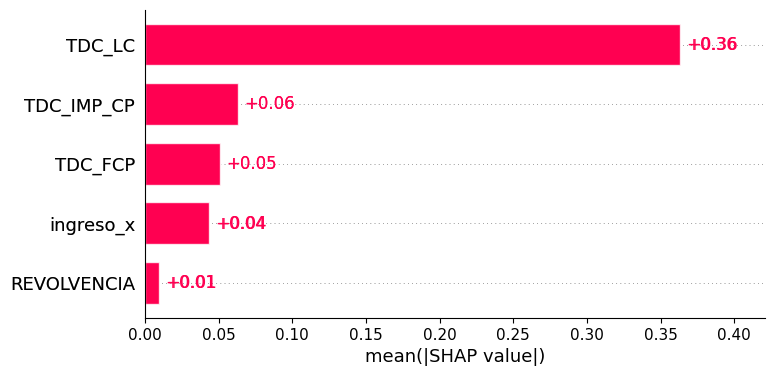

In [49]:
shap.plots.bar(shap_values, show= False)
plt.savefig('../graphs/tdc_shap_bar.png')
shap.plots.bar(shap_values)

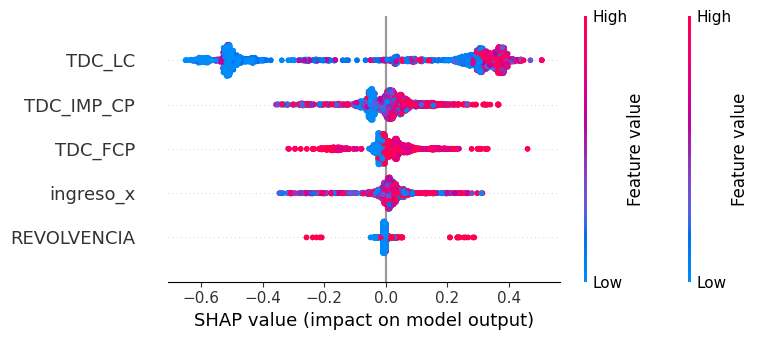

In [50]:
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig('../graphs/tdc_shap_summary.png')
shap.summary_plot(shap_values, X_test)

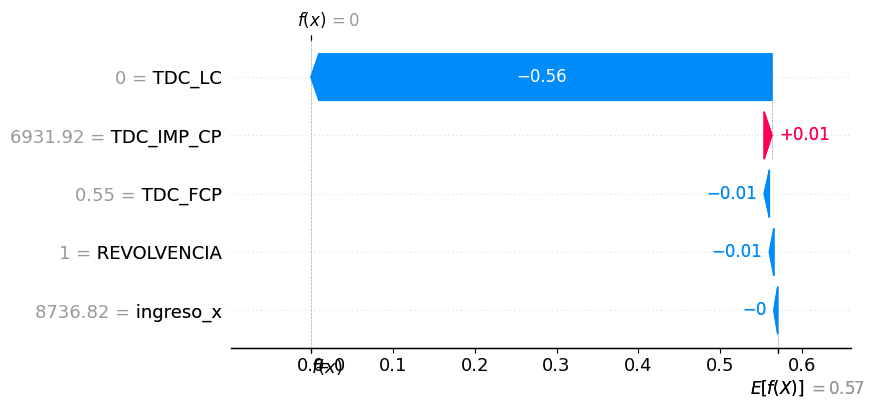

In [51]:
obs=0
shap.plots.waterfall(shap_values[obs], show=False)
plt.savefig(f'../graphs/tdc_shap_waterfall_plot_{obs}.png')
shap.plots.waterfall(shap_values[obs])

### 04.2 Préstamo personal

Variables importantes: ingreso_x, REVOLVENCIA, PP_FCP, PP_LC, TASA_PP, PLAZO_PP, PP_IMP_CP, Buro_Ref, RES_FINAL_PP

In [52]:
df_prestamo= df_ofertas_customers[['ingreso_x', 'REVOLVENCIA', 'PP_FCP', 'PP_LC', 'TASA_PP', 'PLAZO_PP', 'PP_IMP_CP', 'RES_FINAL_PP']].copy()
df_prestamo

ingreso_x REVOLVENCIA  PP_FCP     PP_LC  TASA_PP  PLAZO_PP  PP_IMP_CP  \
0       6805.12  Transactor     0.6  132000.0    28.99      48.0    8129.15   
1       6805.12  Transactor     0.6  132000.0    28.99      48.0    8129.15   
2       6805.12  Transactor     0.6  132000.0    28.99      48.0    8129.15   
3       4109.15  Transactor     0.6  156000.0    28.99      48.0    7691.34   
4       4109.15  Transactor     0.6  156000.0    28.99      48.0    7691.34   
...         ...         ...     ...       ...      ...       ...        ...   
7313    2353.12  Transactor     0.6  195000.0    23.99      60.0    8216.85   
7314    4042.25  Transactor     0.7  192000.0    28.99      48.0    4580.76   
7315    4042.25  Transactor     0.7  192000.0    28.99      48.0    4580.76   
7316    4042.25  Transactor     0.7  192000.0    28.99      48.0    4580.76   
7317    7183.67    Revolver     0.0       0.0     0.00       0.0       0.00   

      RES_FINAL_PP  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  
...            ...  
7313           1.0  
7314           1.0  
7315           1.0  
7316           1.0  
7317           2.0  

[7318 rows x 8 columns]

In [53]:
df_prestamo['REVOLVENCIA']= df_prestamo['REVOLVENCIA'].replace({'Transactor':1, 'Revolver':2})
df_prestamo['RES_FINAL_PP']= df_prestamo['RES_FINAL_PP'].replace({2.0:0}).astype(int)
df_prestamo.describe()

C:\Users\Hp\AppData\Local\Temp\ipykernel_19492\3066583948.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



ingreso_x  REVOLVENCIA      PP_FCP           PP_LC      TASA_PP  \
count   7318.000000  7318.000000  7318.00000     7318.000000  7318.000000   
mean    6403.637838     1.141979     0.45399   174065.591692    21.042285   
std     3141.412998     0.349052     0.25350   177894.626363    13.771184   
min        2.230000     1.000000     0.00000        0.000000     0.000000   
25%     3955.922500     1.000000     0.45000    20000.000000     0.000000   
50%     7318.725000     1.000000     0.60000   140000.000000    24.990000   
75%     9194.040000     1.000000     0.60000   250000.000000    28.990000   
max    10000.000000     2.000000     0.70000  1000000.000000    45.990000   

          PLAZO_PP    PP_IMP_CP  RES_FINAL_PP  
count  7318.000000  7318.000000   7318.000000  
mean     40.443837  4660.359567      0.697868  
std      24.413991  3870.897546      0.459213  
min       0.000000     0.000000      0.000000  
25%       0.000000     0.000000      0.000000  
50%      48.000000  3648.420000      1.000000  
75%      60.000000  8805.440000      1.000000  
max      60.000000  9999.850000      1.000000

In [54]:
X= df_prestamo.drop(columns='RES_FINAL_PP')
y= df_prestamo['RES_FINAL_PP']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 421,   30],
       [   8, 1005]], dtype=int64)

In [55]:
with open('../models/model_prestamo.pkl', 'wb') as file:
    pickle.dump(model, file)

In [56]:
try: 
    with open('../models/shap_prestamo.pkl', 'rb') as file:
        explainer = shap.Explainer(model.predict, X_test)
        shap_values= pickle.load(file)
except:
    
    explainer = shap.Explainer(model.predict, X_test)
    shap_values = explainer(X_test)
    with open('../models/shap_prestamo.pkl', 'wb') as file:
        pickle.dump(shap_values, file)

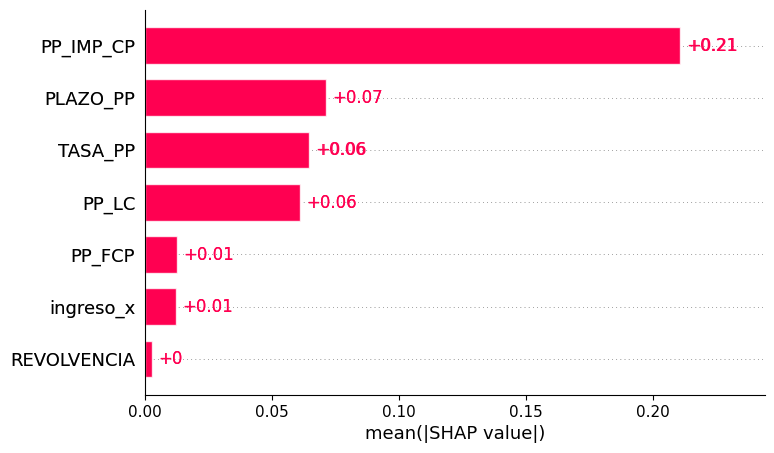

In [57]:
shap.plots.bar(shap_values, show= False)
plt.savefig('../graphs/prestamo_shap_bar.png')
shap.plots.bar(shap_values)

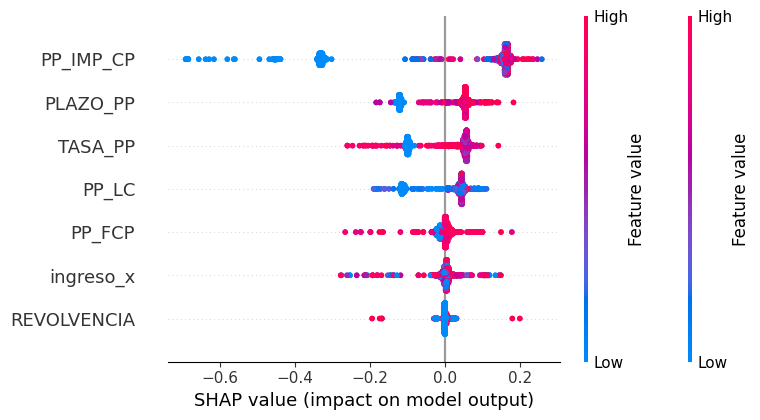

In [58]:
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig('../graphs/prestamo_shap_summary.png')
shap.summary_plot(shap_values, X_test)

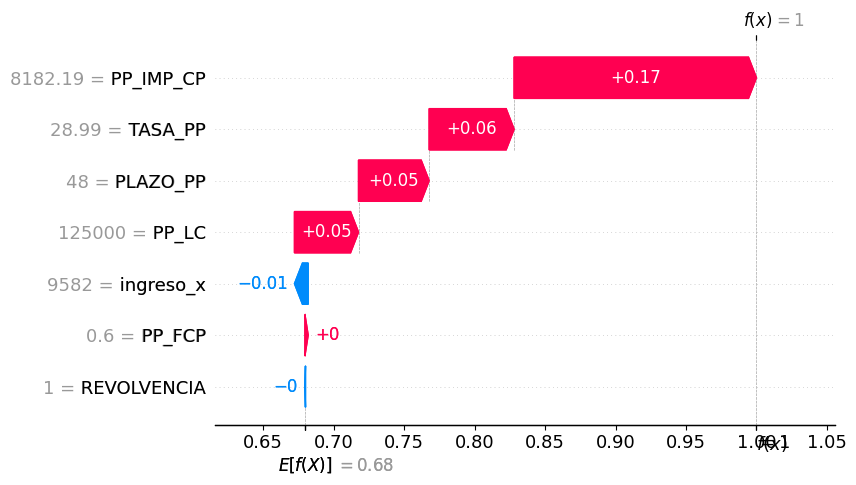

In [59]:
obs=1
shap.plots.waterfall(shap_values[obs], show=False)
plt.savefig(f'../graphs/prestamo_shap_waterfall_plot_{obs}.png')
shap.plots.waterfall(shap_values[obs])

### 04.3 Interpolación

In [60]:
df_ofertas_customers_demograficos

NUM_CTE  PRODUCTO  SUBPROD  ID_PROCESO    DESTINO   TIPO_CTE  \
0     1-100169-LZ       4.0      2.0         2.0  1000001.0  1000004.0   
1     1-100169-LZ       1.0      2.0         2.0  1000001.0  1000004.0   
2     1-100169-LZ       2.0      2.0         2.0  1000001.0  1000004.0   
3     1-100527-HD       2.0      2.0         2.0  1000001.0  1000004.0   
4     1-100527-HD       4.0      2.0         2.0  1000001.0  1000004.0   
...           ...       ...      ...         ...        ...        ...   
7226  1-999199-P[       2.0      2.0         2.0  1000001.0  1000006.0   
7229  1-999239-WH       4.0      2.0         2.0  1000001.0  1000004.0   
7230  1-999239-WH       2.0      2.0         2.0  1000001.0  1000004.0   
7228  1-999239-WH       1.0      2.0         2.0  1000001.0  1000004.0   
7231  1-999502-ZM       2.0      2.0         2.0  1000001.0  1000006.0   

      COTIZACION  TIPO_OFERTA                        DES_PROD DES_PROD_GLOBAL  \
0         8776.0  Preaprobado                Credito Personal         Consumo   
1           99.0  Preaprobado  Tarjeta de Credito Preaprobado        Tarjetas   
2           99.0  Preaprobado                      Inmediauto           Autos   
3           99.0  Preaprobado                      Inmediauto           Autos   
4         8776.0  Preaprobado                Credito Personal         Consumo   
...          ...          ...                             ...             ...   
7226        99.0  Preaprobado                      Inmediauto           Autos   
7229      8776.0  Preaprobado                Credito Personal         Consumo   
7230        99.0  Preaprobado                      Inmediauto           Autos   
7228        99.0  Preaprobado  Tarjeta de Credito Preaprobado        Tarjetas   
7231        99.0  Preaprobado                      Inmediauto           Autos   

      ... cve_zona  edo_civil CVE_SUC                 NOM_SUC  CVE_ZONA  \
0     ...   9610.0          S    3056      SUC. CALLE SESENTA      9610   
1     ...   9610.0          S    3056      SUC. CALLE SESENTA      9610   
2     ...   9610.0          S    3056      SUC. CALLE SESENTA      9610   
3     ...   6150.0          C     170             SUC. AYUTLA      6150   
4     ...   6150.0          C     170             SUC. AYUTLA      6150   
...   ...      ...        ...     ...                     ...       ...   
7226  ...   9610.0          C    3042          SUC. CHAMPOTON      9610   
7229  ...   9932.0          C     248             SUC. OCAMPO      9932   
7230  ...   9932.0          C     248             SUC. OCAMPO      9932   
7228  ...   9932.0          C     248             SUC. OCAMPO      9932   
7231  ...   6777.0          C     144  SUC. ESTACION VICTORIA      6777   

                 NOM_ZONA CVE_COORD          NOM_COORD    latitud    longitud  
0     D DIV RB PENINSULAR      9308    P05 - PENINSULA  19.367531  -99.286829  
1     D DIV RB PENINSULAR      9308    P05 - PENINSULA  19.367531  -99.286829  
2     D DIV RB PENINSULAR      9308    P05 - PENINSULA  19.367531  -99.286829  
3      D DIV RB OCCIDENTE      6044       O06 - COLIMA  20.201738 -104.397665  
4      D DIV RB OCCIDENTE      6044       O06 - COLIMA  20.201738 -104.397665  
...                   ...       ...                ...        ...         ...  
7226  D DIV RB PENINSULAR      9308    P05 - PENINSULA  19.355556  -90.723333  
7229       D DIV RB NORTE      8011  N04 - MONTERREY 4  25.663635 -100.227525  
7230       D DIV RB NORTE      8011  N04 - MONTERREY 4  25.663635 -100.227525  
7228       D DIV RB NORTE      8011  N04 - MONTERREY 4  25.663635 -100.227525  
7231   D DIV  RB NOROESTE      7611    NO03 - MEXICALI  32.392352 -115.229740  

[7232 rows x 150 columns]

In [61]:
px.scatter(df_ofertas_customers_demograficos, y= 'latitud', x= 'longitud', color='ingreso_x', color_continuous_scale= px.colors.diverging.RdBu, width=600)

In [66]:
list(df_ofertas_customers_demograficos.columns)

['NUM_CTE',
 'PRODUCTO',
 'SUBPROD',
 'ID_PROCESO',
 'DESTINO',
 'TIPO_CTE',
 'COTIZACION',
 'TIPO_OFERTA',
 'DES_PROD',
 'DES_PROD_GLOBAL',
 'FLUJO',
 'TEST_FLUJO',
 'TIPO_PRODUCTO',
 'VIGENCIA',
 'LINEA_APROBADA_LEAP',
 'TIPO_LINEA',
 'ESTATUS_OFERTA_ORIGEN',
 'ESTATUS_OFERTAS_003',
 'ERROR_RECHAZO',
 'DESCRIP_ESTATUS_021',
 'TIPO_TDC_x',
 'DESCRIP_TIPO_TDC',
 'TIPO',
 'BITACORA_CAMBIOS',
 'BAJA',
 'FECHA_BAJA',
 'FEC_ULT_ACT_ST_021',
 'FEC_PROCESO',
 'MES_INFORMACION',
 'MES_INFO_EVAL',
 'MES_CAMPANA',
 'LLAVE_MULT',
 'customeraccount_x',
 'tpo_cliente_x',
 'Tpo_CTA',
 'tpo_cte_op',
 'PENSIONADO',
 'REVOLVENCIA',
 'ingreso_x',
 'TDC_FCP',
 'TDC_IMP_CP',
 'TDC_LC',
 'DES_TIPO_TDC',
 'TIPO_TDC_y',
 'RES_FINAL_TDC',
 'REJECTION_TDC',
 'BND_BT',
 'Monto_bt',
 'TASA_TDC',
 'RISK_LEVEL_AN',
 'AN_FCP',
 'BND_REVOLVENCIA_AN',
 'AN_LC',
 'PLAZO_AN',
 'AN_IMP_CP',
 'RES_FINAL_AN',
 'bnd_alt_ejec',
 'COTIZACION_AN',
 'TPO_CTE_LEAP',
 'DES_TPO_CTE_LEAP',
 'PLAZO_INM',
 'INM_LC',
 'INM_IMP_CP',


In [69]:
# Assuming df is your DataFrame and it has columns 'longitud', 'latitud', and 'rating'
longitudes = df_ofertas_customers_demograficos['longitud'].values
latitudes = df_ofertas_customers_demograficos['latitud'].values
ratings = df_ofertas_customers_demograficos['ingreso_x'].values

# Create an ordinary kriging model
OK = OrdinaryKriging(longitudes, latitudes, ratings, variogram_model='spherical', verbose=False, enable_plotting=False)

# Define a grid of points at which to evaluate the kriging model
grid_longitudes = np.linspace(min(longitudes), max(longitudes), 100)
grid_latitudes = np.linspace(min(latitudes), max(latitudes), 100)

# Use the model to predict values at the grid points
z, ss = OK.execute('grid', grid_longitudes, grid_latitudes)

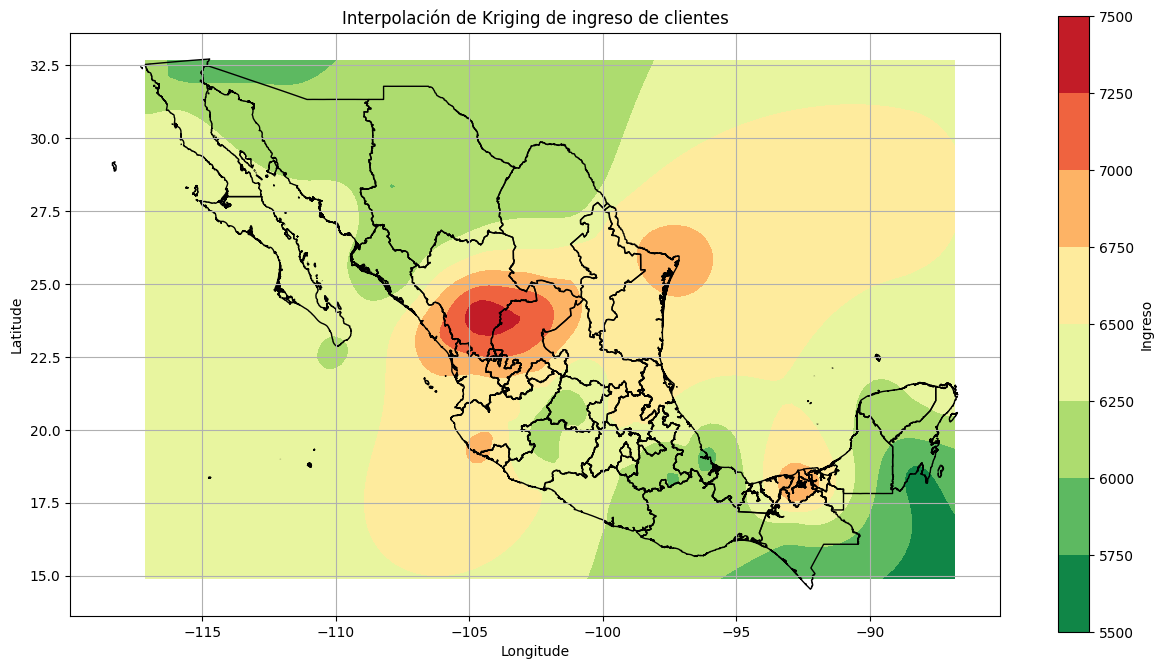

In [70]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Create a contour plot
contour = ax.contourf(grid_longitudes, grid_latitudes, z, cmap='RdYlGn_r')

# Plot the GeoPandas DataFrame
gdf.plot(ax=ax, color='none', edgecolor='black')

# Add a colorbar
fig.colorbar(contour, ax=ax, label='Ingreso')


# Add labels and title
ax.set_title('Interpolación de Kriging de ingreso de clientes')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.savefig('../graphs/kriging_ingreso_clientes.png')

plt.grid(True)
plt.show()

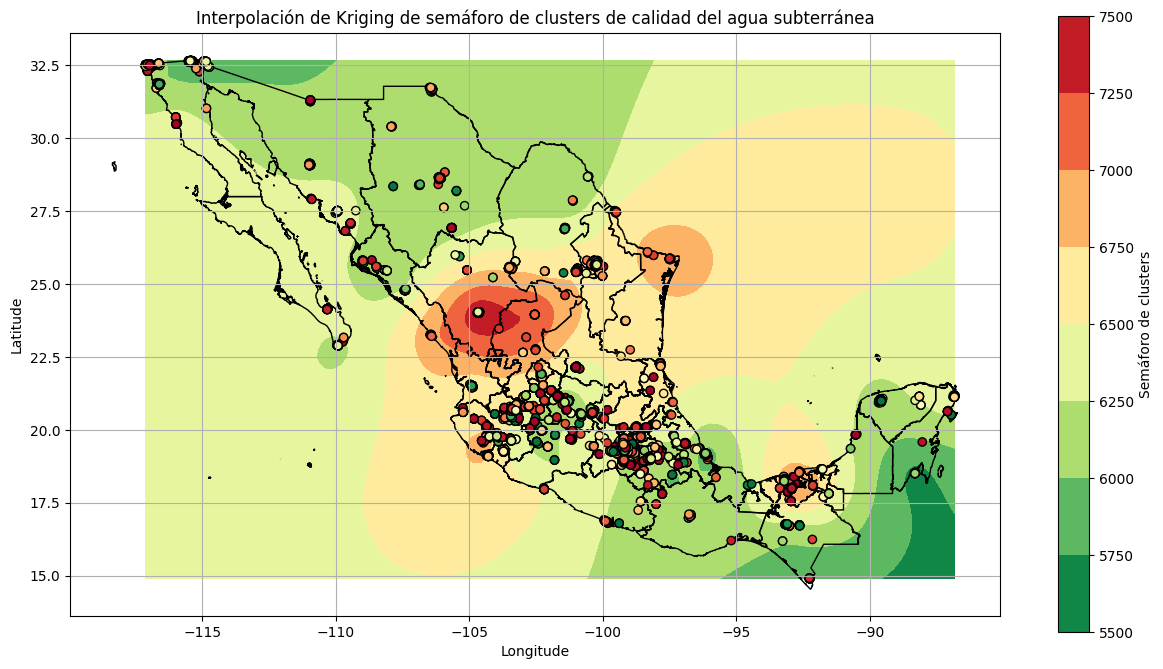

In [64]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Create a contour plot
contour = ax.contourf(grid_longitudes, grid_latitudes, z, cmap='RdYlGn_r')

# Plot the GeoPandas DataFrame
gdf.plot(ax=ax, color='none', edgecolor='black')

# Add a colorbar
fig.colorbar(contour, ax=ax, label='Semáforo de clusters')

# Plot the original data points
scatter = ax.scatter(longitudes, latitudes, c=ratings, edgecolors='k', cmap='RdYlGn_r')

# Add labels and title
ax.set_title('Interpolación de Kriging de ingreso de clientes')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.savefig('../graphs/kriging_ingreso_clientes_puntos.png')

plt.grid(True)
plt.show()